In [1]:
#rede muito simples para regressão linear
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#define a rede
model = tf.keras.Sequential([tf.keras.layers.Dense(units =1, input_shape=[1])])
#configura e compila a rede
model.compile(optimizer='SGD', loss='mean_squared_error')
# train data
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = 2 * xs - 1
#treinando a rede
history=model.fit(xs, ys, epochs = 100,verbose=0)
#test data
print('y(10)=',model.predict([10.0]))

y(10)= [[17.872654]]


Model: "rede_IF_01"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'mean_absolute_error'])


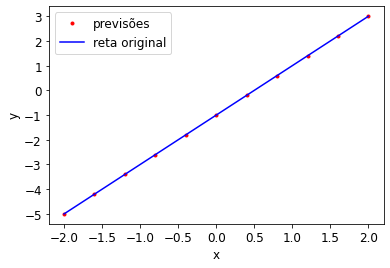

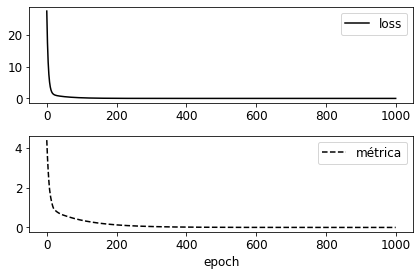

In [2]:
#rede completa para regressão linear
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#D train (data set)
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = 2 * xs - 1
# criando a rede neural
model = tf.keras.Sequential(name='rede_IF_01')
#configurando a primeira camada da rede
model.add(tf.keras.layers.Dense(1, input_dim=1, use_bias=1, activation='linear'))
opt=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
model.compile(optimizer=opt, loss='mean_squared_error', metrics='mean_absolute_error')
print(model.summary())
# treinando a rede
history =model.fit(xs, ys, epochs = 1000,verbose=0)
#testando a rede
xs_test=np.linspace(-2,2,11);
ys_test=model.predict(xs_test)
#fazendo os gráficos
plt.rcParams.update({'font.size': 12})
plt.figure()
plt.plot(xs_test,ys_test,'r.')
plt.plot(xs_test,(2 * xs_test - 1),'b-')
plt.legend(['previsões','reta original'])
plt.xlabel('x');plt.ylabel('y')
# mostra os dados em history
print(history.history.keys())
# plota o loss e a metrica
plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['loss'],'k')
plt.legend(['loss'])
plt.subplot(2,1,2)
plt.plot(history.history['mean_absolute_error'],'k--')
plt.legend(['métrica'])
plt.xlabel('epoch')
plt.tight_layout()
plt.show()

In [3]:
var_loss=history.history['loss']
for n in range(0,999):
  if var_loss[n]<1e-6:
    break
print('n= ',n) 
print('loss(n)= ',var_loss[n])   

n=  688
loss(n)=  9.845689419307746e-07


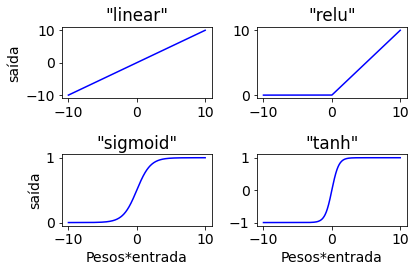

In [4]:
#mostra as funções de ativação
plt.rcParams.update({'font.size': 14})
xact = np.linspace(-10.0,+10.0,1000)
ylinear = 1 * xact + 0
yrelu = np.maximum(xact,np.zeros_like(xact))
ysig = 1/(1+np.exp(-xact))
ytanh = np.tanh(xact)
plt.figure()
plt.subplot(2,2,1)
plt.plot(xact,ylinear,'b-')
plt.title('"linear"')
plt.ylabel('saída')
#plt.xlabel('Pesos*entrada')
plt.subplot(2,2,2)
plt.plot(xact,yrelu,'b-')
plt.title('"relu"')
#plt.ylabel('saída')
#plt.xlabel('Pesos*entrada')
plt.subplot(2,2,3)
plt.plot(xact,ysig,'b-')
plt.title('"sigmoid"')
plt.ylabel('saída')
plt.xlabel('Pesos*entrada')
plt.subplot(2,2,4)
plt.plot(xact,ytanh,'b-')
plt.title('"tanh"')
#plt.ylabel('saída')
plt.xlabel('Pesos*entrada')

plt.tight_layout()
plt.show()